In [1]:
import numpy as np
import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [2]:
import sklearn
sklearn.__version__

'0.22.1'

In [3]:
train = pd.read_csv("E:\FDP\Inceptez\Hackathon/train.csv")
test = pd.read_csv("E:\FDP\Inceptez\Hackathon/test.csv")

In [4]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [25]:
train_X = train.drop(columns= ["POSTED_BY","BHK_OR_RK","ADDRESS"])

In [26]:
test_X =test.drop(columns= ["POSTED_BY","BHK_OR_RK","ADDRESS"])

In [27]:
train_y = train["TARGET(PRICE_IN_LACS)"]

In [28]:
len(test_X.columns)

8

In [33]:
sample = pd.read_csv("E:\FDP\Inceptez\Hackathon/sample_submission.csv")
def run_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    pd.Series(model.coef_,index=test_X.columns).plot(kind = "bar")
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print("RMSE of Train Data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    sample["TARGET(PRICE_IN_LACS)"] = pred_test
    sample.to_csv(filename, index = False)
    

In [34]:
model = LinearRegression()
run_model(model, train_X, train_y, test_X, sample, "test_result_Linear_regression.csv" )

ValueError: Length of passed values is 9, index implies 8.

RMSE of Train Data =  1128.907789356236
Cross validation Score  =  1133.4736105613622


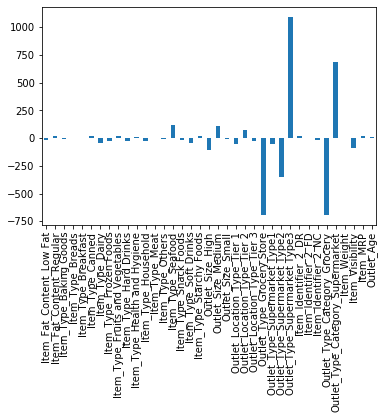

In [111]:
model = Ridge(alpha = 30)
run_model(model, train_X, train_y, test_X, sample, "test_result_Ridge_regression.csv" )

RMSE of Train Data =  1140.2661956391537
Cross validation Score  =  1141.0112631830136


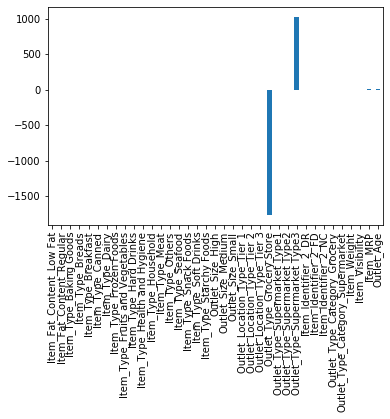

In [120]:
model = Lasso(alpha=30)
run_model(model, train_X, train_y, test_X, sample, "test_result_Lasso_regression.csv" )

RMSE of Train Data =  1243.0058476639092
Cross validation Score  =  1244.181751521292


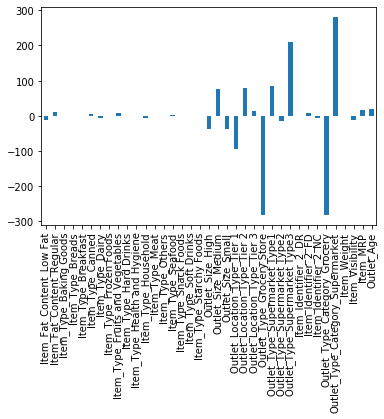

In [125]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
run_model(model, train_X, train_y, test_X, sample, "test_result_ElasticNet_regression.csv" )